In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import librosa

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [4]:

# This CSV was created by pairing features from NoisySpeech_training with labels generated from CleanSpeech_training.
df = pd.read_csv('/train_data.csv')
print(f"✅ Dataset shape: {df.shape}")
df.head()

✅ Dataset shape: (114210, 41)


,feat_0,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_31,feat_32,feat_33,feat_34,feat_35,feat_36,feat_37,feat_38,feat_39,label
0,-15.516254,-22.968904,-32.217449,-35.218082,-29.140919,-27.065075,-38.719135,-44.110107,-46.598316,-45.657166,...,-51.964283,-52.479877,-51.118740,-28.879284,-33.555359,-56.095730,-54.692570,-53.937798,-55.178474,0.0
1,-8.715273,-20.019739,-28.882332,-30.962872,-29.324703,-26.157234,-35.029442,-36.694374,-42.052273,-44.067421,...,-49.881573,-51.041023,-50.215584,-26.915941,-31.636904,-54.287609,-52.750721,-52.369186,-53.041916,0.0
2,-4.946245,-21.614094,-29.517918,-30.779156,-29.028603,-27.927999,-35.010487,-37.773155,-40.830292,-45.002678,...,-51.525707,-51.987892,-49.405334,-27.994921,-32.788570,-54.265057,-51.653942,-52.598587,-53.174782,0.0
3,-4.578308,-22.841881,-28.530741,-31.003429,-29.114689,-29.355671,-36.852425,-41.755466,-43.263454,-41.882103,...,-53.243759,-52.062958,-50.003952,-26.741974,-31.598080,-58.286186,-51.776642,-52.800694,-53.994560,0.0
4,-4.545387,-19.957903,-27.650040,-29.683056,-32.172554,-30.662844,-36.465286,-43.712917,-43.499142,-39.897011,...,-50.872234,-51.181789,-52.092361,-25.584999,-30.562557,-55.301346,-51.227856,-52.198452,-53.260006,0.0


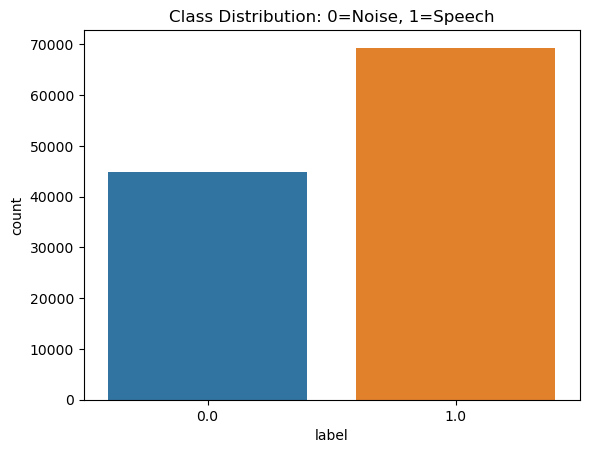


Label distribution:
 1.0    0.607127
0.0    0.392873
Name: label, dtype: float64

Missing values:
 feat_0     0
feat_1     0
feat_2     0
feat_3     0
feat_4     0
feat_5     0
feat_6     0
feat_7     0
feat_8     0
feat_9     0
feat_10    0
feat_11    0
feat_12    0
feat_13    0
feat_14    0
feat_15    0
feat_16    0
feat_17    0
feat_18    0
feat_19    0
feat_20    0
feat_21    0
feat_22    0
feat_23    0
feat_24    0
feat_25    0
feat_26    0
feat_27    0
feat_28    0
feat_29    0
feat_30    0
feat_31    0
feat_32    0
feat_33    0
feat_34    0
feat_35    0
feat_36    0
feat_37    0
feat_38    0
feat_39    0
label      0
dtype: int64

Duplicate rows: 242


,feat_0,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_31,feat_32,feat_33,feat_34,feat_35,feat_36,feat_37,feat_38,feat_39,label
count,114210.000000,114210.000000,114210.000000,114210.000000,114210.000000,114210.000000,114210.000000,114210.000000,114210.000000,114210.000000,...,114210.000000,114210.000000,114210.000000,114210.000000,114210.000000,114210.000000,114210.000000,114210.000000,114210.000000,114210.000000
mean,-3.544993,-3.786186,-3.230078,-6.233615,-6.372443,-6.569138,-8.007691,-10.117548,-12.624927,-14.243603,...,-26.894652,-28.278359,-29.976685,-30.872217,-32.197345,-33.655046,-34.220770,-34.581467,-36.154025,0.607127
std,9.162356,12.819136,13.894268,13.136469,13.650715,13.959213,14.069250,13.880447,13.347897,12.908042,...,12.550198,12.745763,12.889199,13.572636,13.571055,13.025570,12.877885,12.940429,12.916655,0.488391
min,-57.259865,-57.105392,-57.171101,-58.237980,-57.519127,-57.519127,-58.653412,-58.304253,-58.776451,-58.776451,...,-61.780483,-61.780483,-61.780483,-61.780483,-61.780632,-61.780483,-61.780483,-61.780632,-61.780632,0.000000
25%,-9.815638,-13.380751,-12.701644,-14.846812,-15.605599,-15.947964,-17.556128,-19.497991,-21.460890,-22.771177,...,-34.759112,-36.647004,-38.670025,-40.509555,-42.207864,-43.220269,-43.545938,-44.043617,-45.862124,0.000000
50%,-4.101071,-1.449550,0.001240,-3.778307,-4.012531,-4.552059,-6.519800,-9.257639,-12.048499,-13.842876,...,-25.995145,-27.637118,-29.598862,-30.848696,-32.282288,-33.774157,-34.368435,-34.670712,-36.361084,1.000000
75%,3.418958,7.100827,7.812908,3.969829,4.257450,4.115387,2.774380,0.322060,-3.133867,-5.232108,...,-18.062010,-19.245682,-20.795015,-21.134196,-22.214139,-24.197805,-25.117189,-25.568468,-27.162968,1.000000
max,26.415981,27.427315,25.335943,26.835712,26.278957,26.837748,26.224926,25.561132,24.158218,23.361828,...,13.798658,14.302439,11.866931,9.248723,6.739657,4.914691,4.259034,5.807305,6.015648,1.000000


In [5]:
sns.countplot(x='label', data=df)
plt.title("Class Distribution: 0=Noise, 1=Speech")
plt.show()

print("\nLabel distribution:\n", df['label'].value_counts(normalize=True))

print("\nMissing values:\n", df.isnull().sum())
print(f"\nDuplicate rows: {df.duplicated().sum()}")
df.describe()


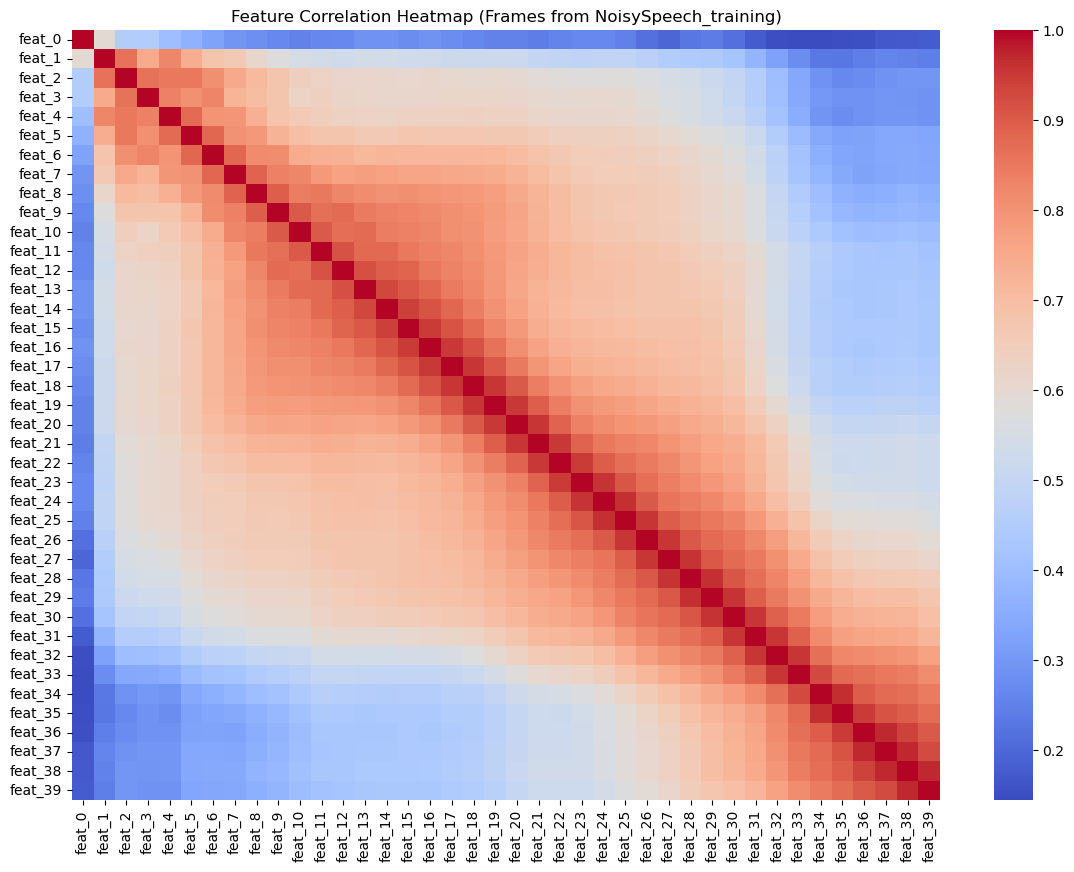

In [6]:
plt.figure(figsize=(14,10))
corr = df.drop('label', axis=1).corr()
sns.heatmap(corr, cmap='coolwarm')
plt.title("Feature Correlation Heatmap (Frames from NoisySpeech_training)")
plt.show()

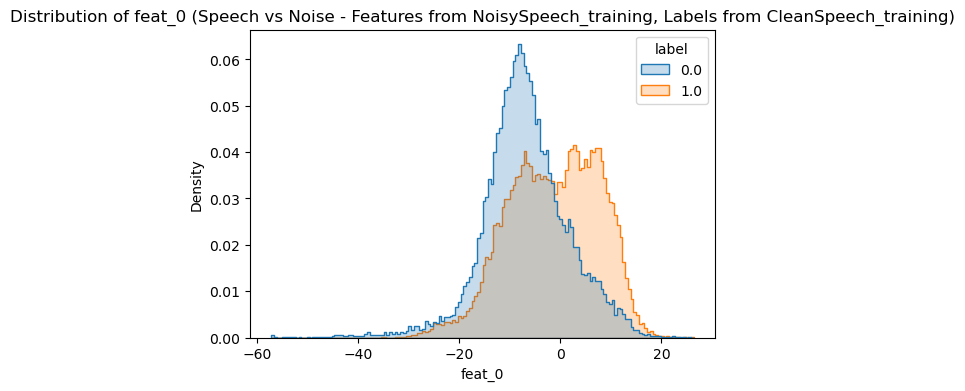

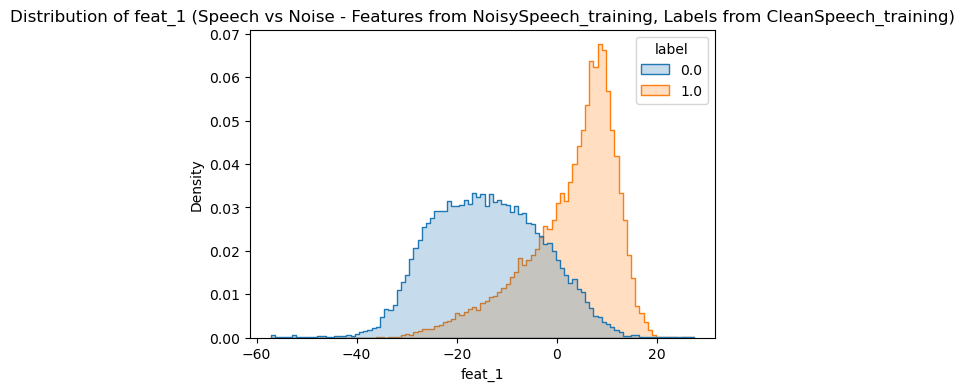

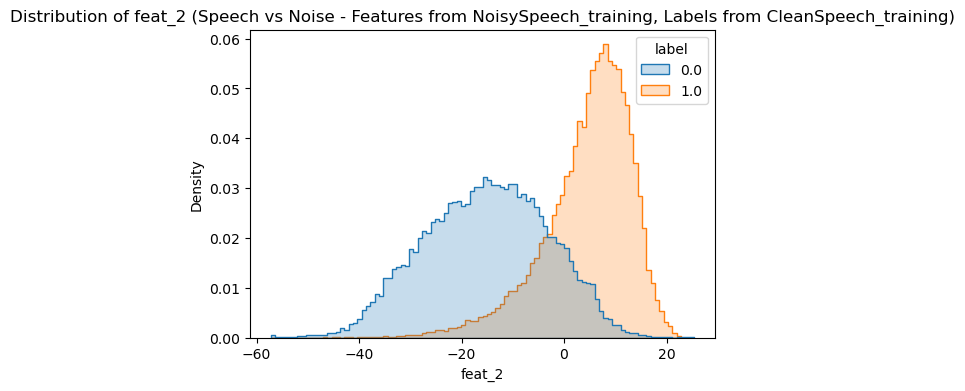

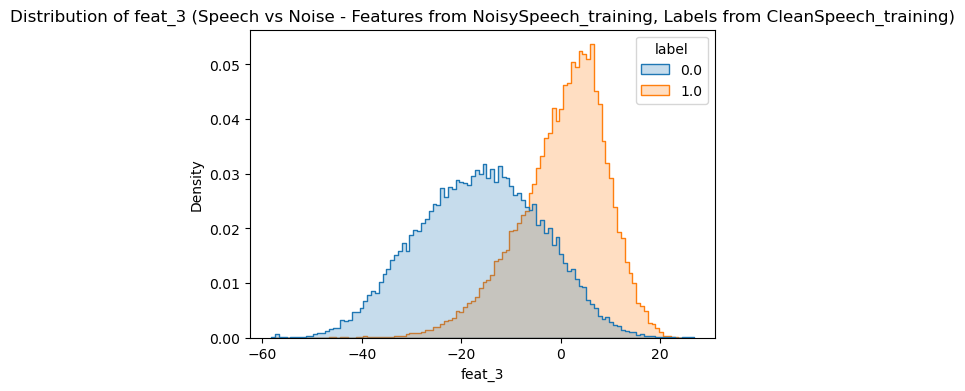

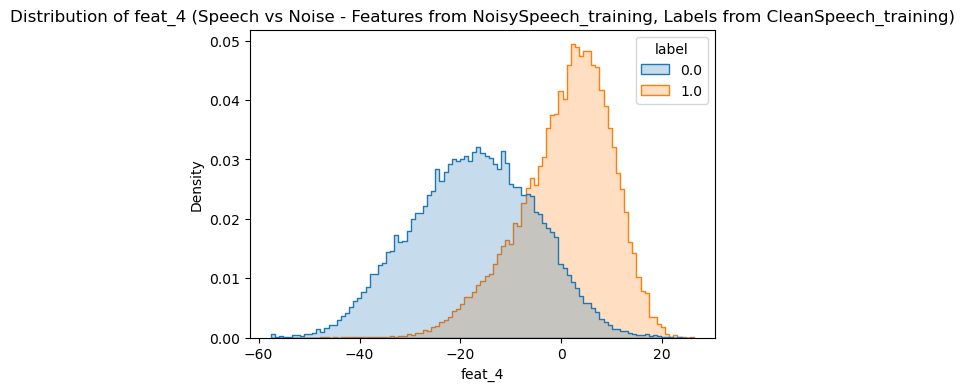

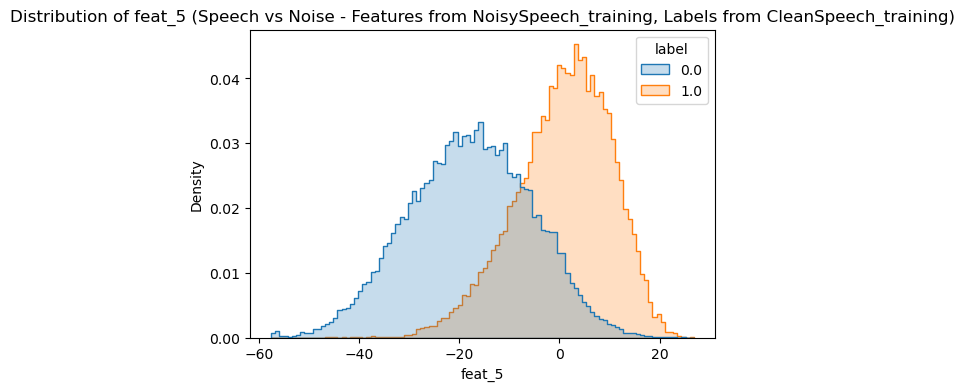

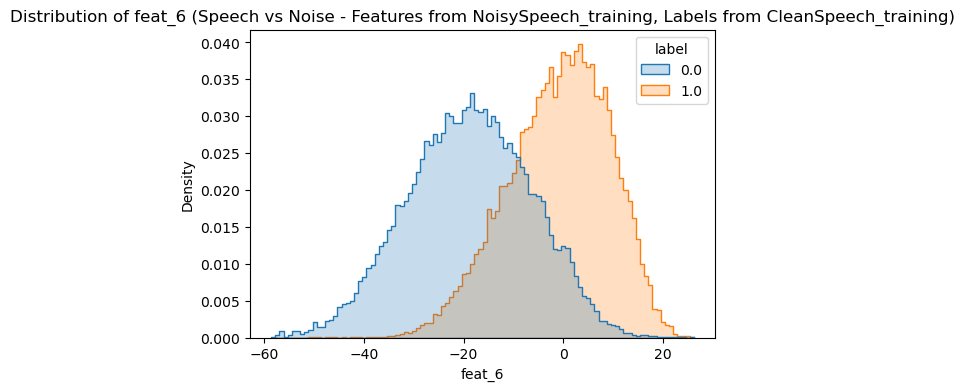

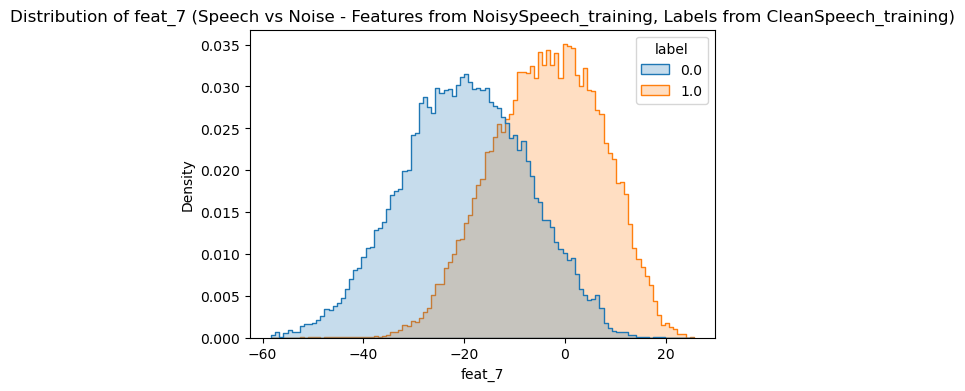

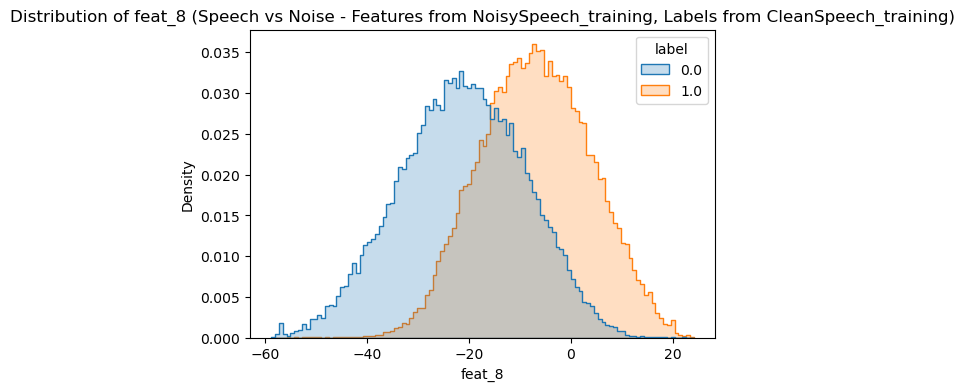

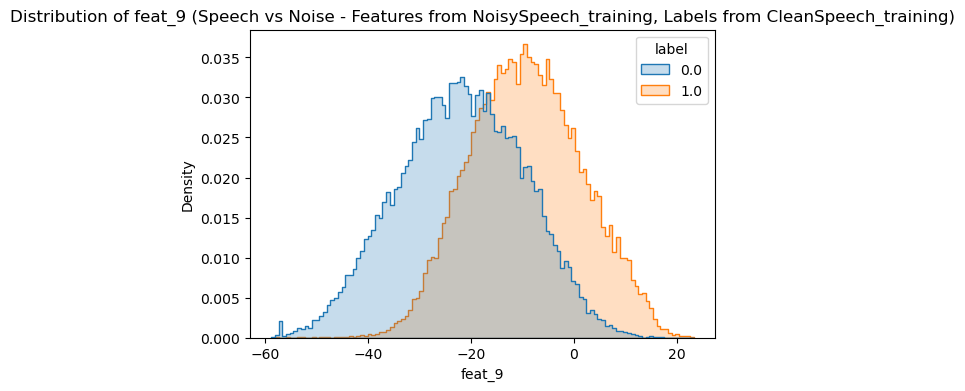

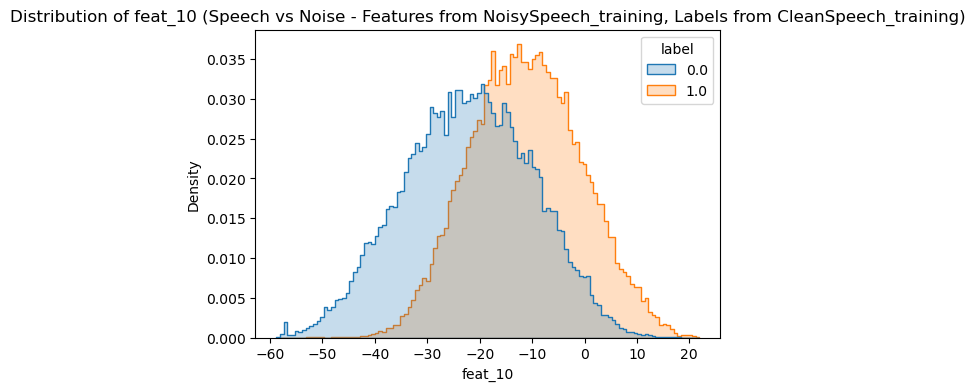

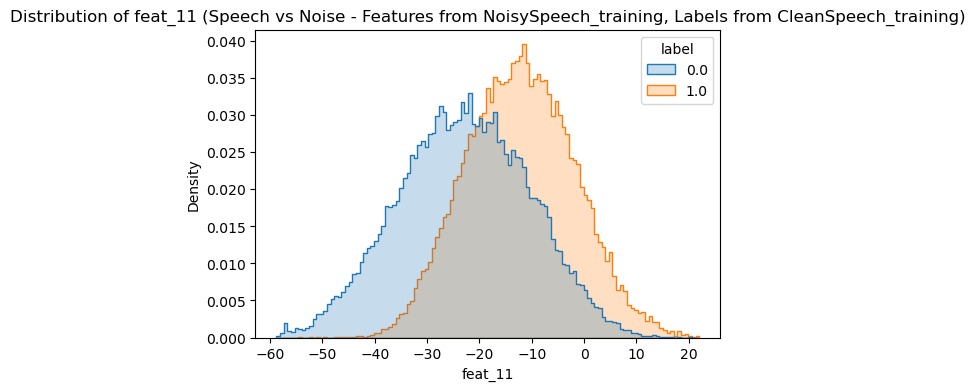

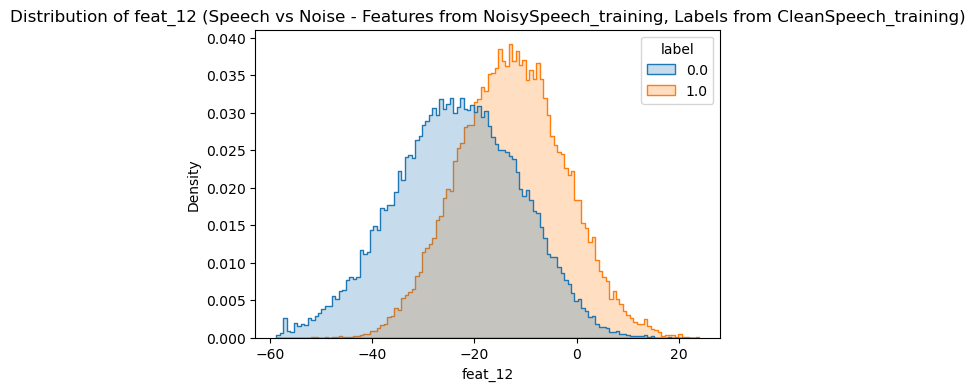

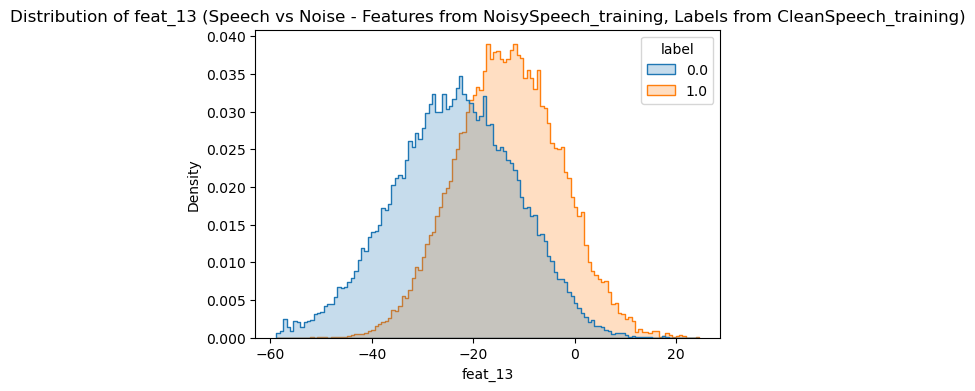

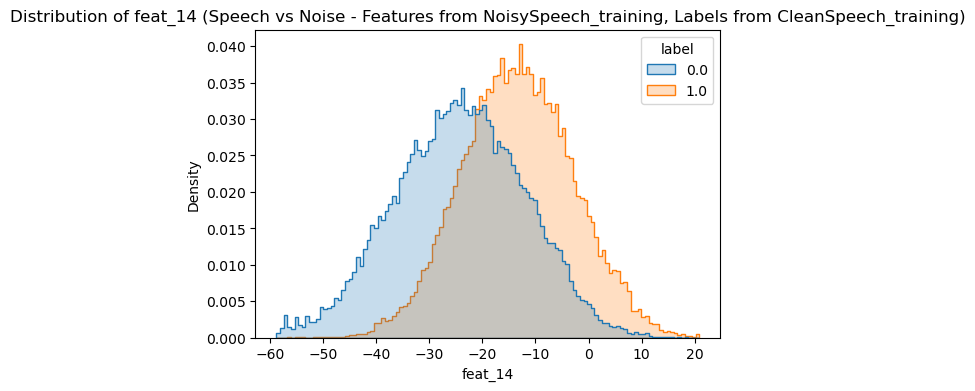

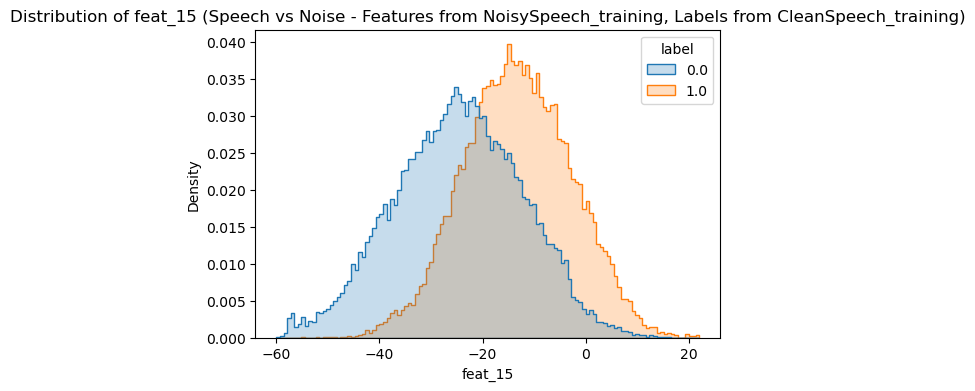

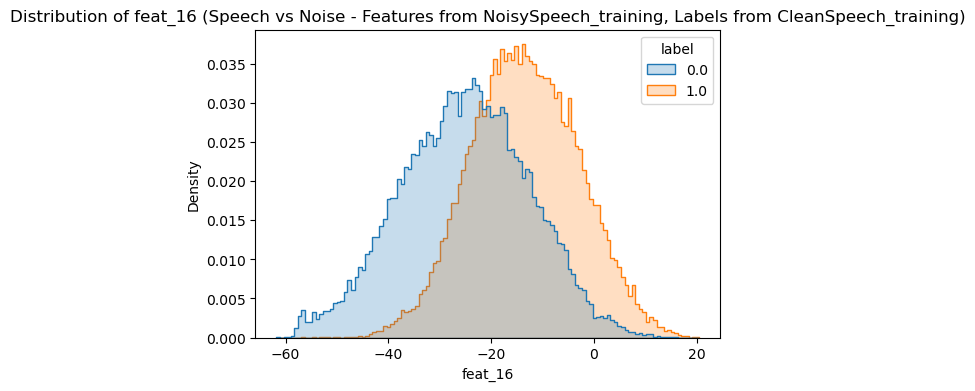

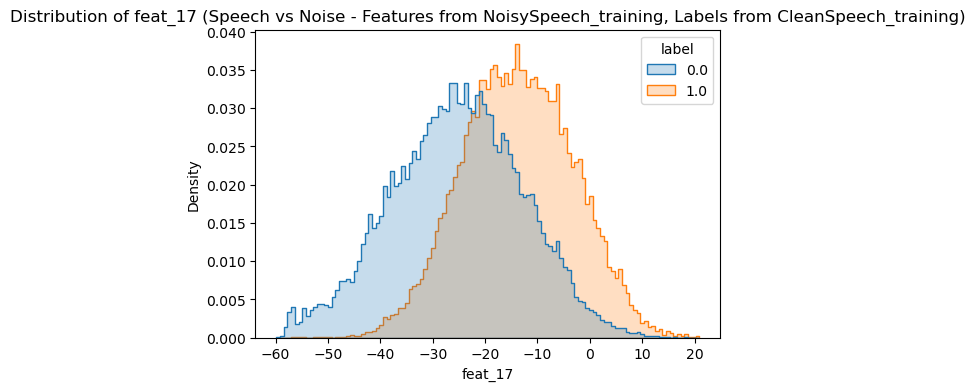

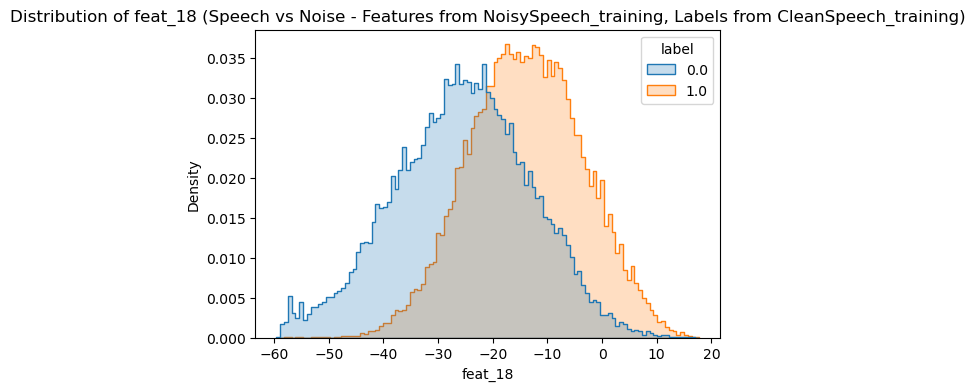

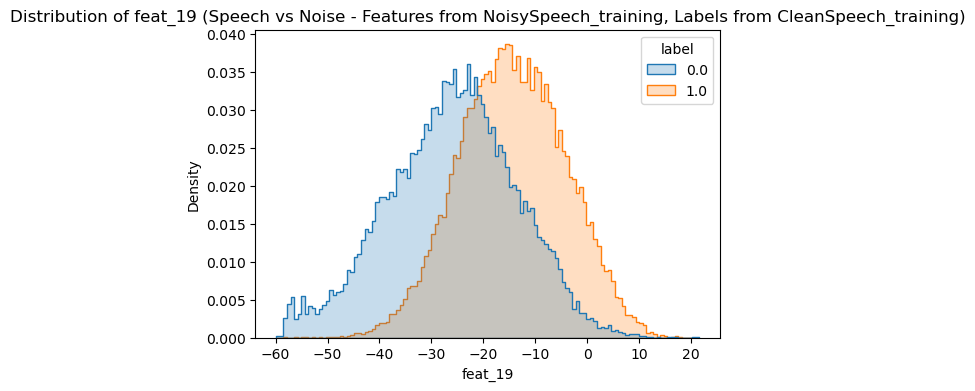

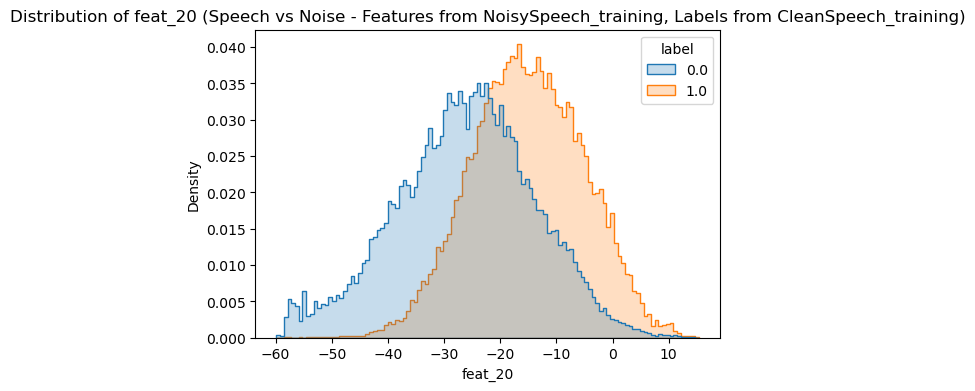

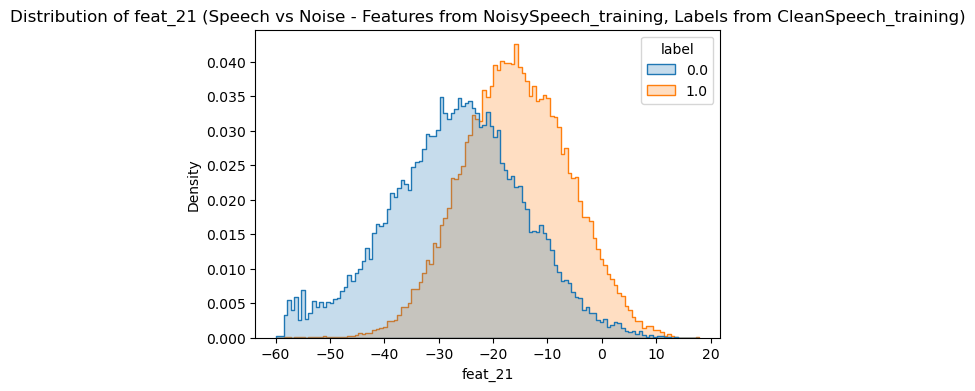

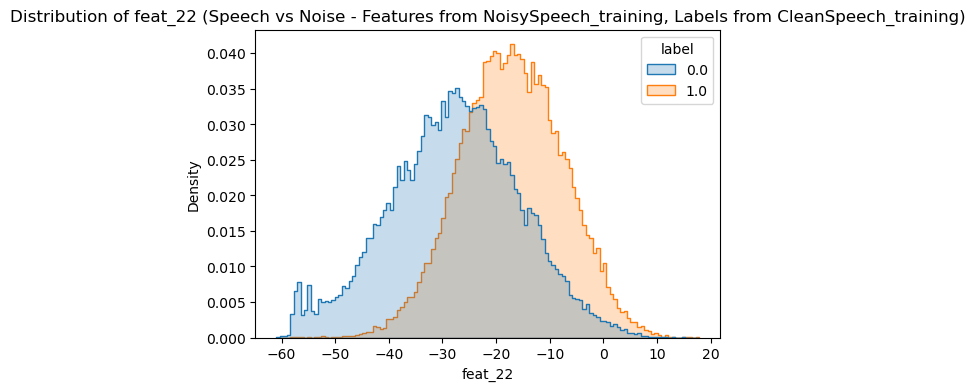

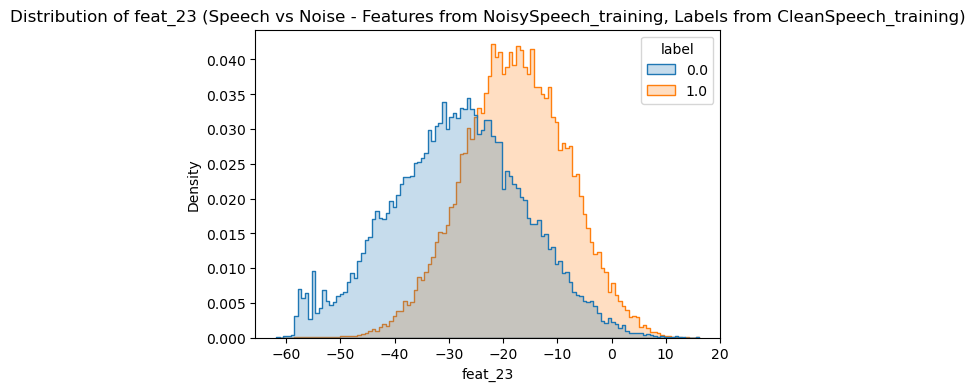

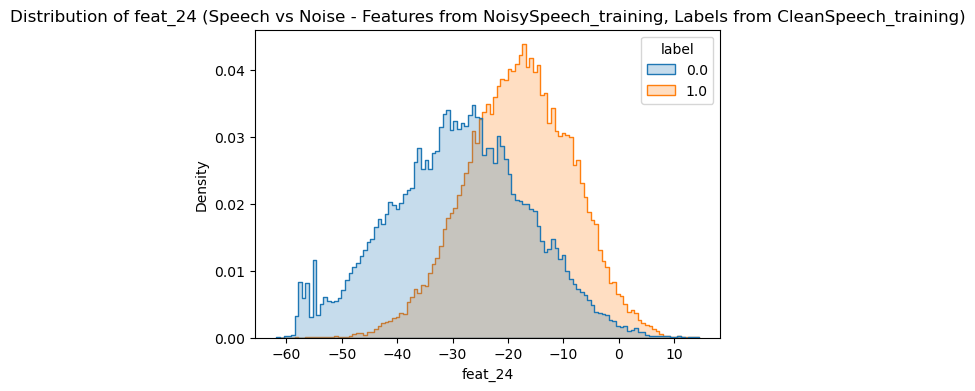

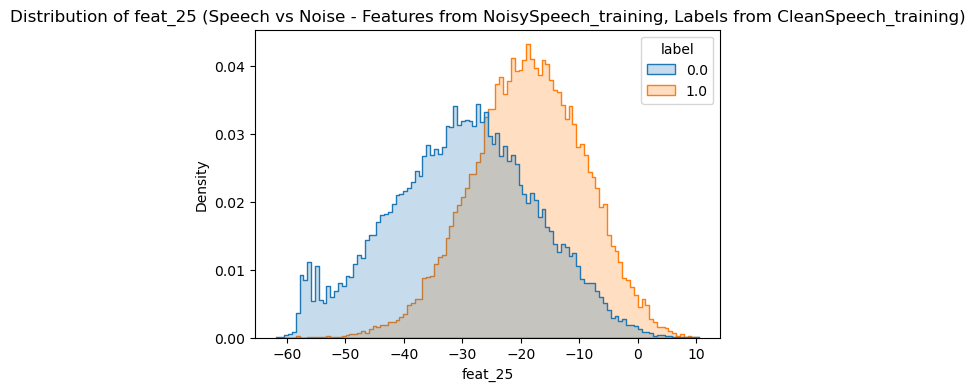

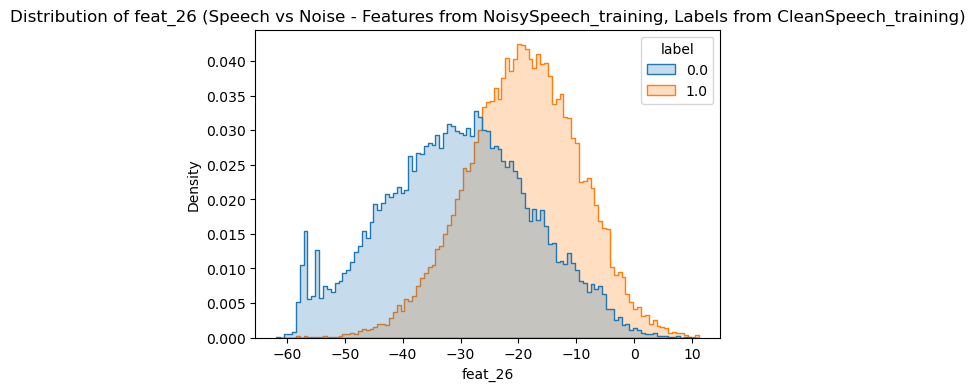

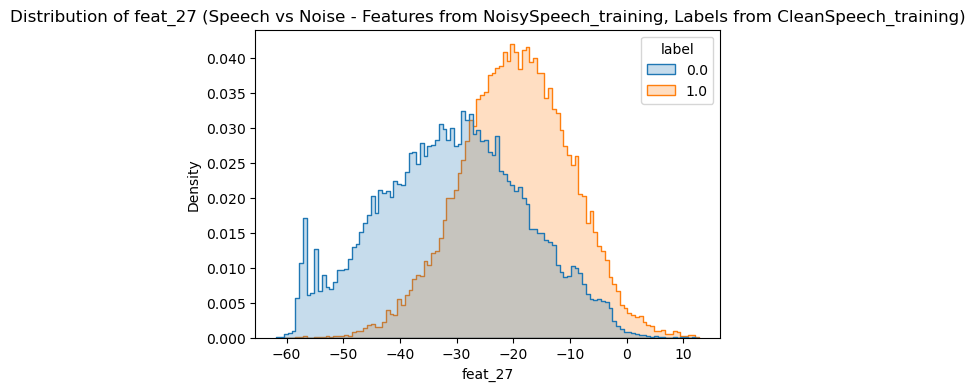

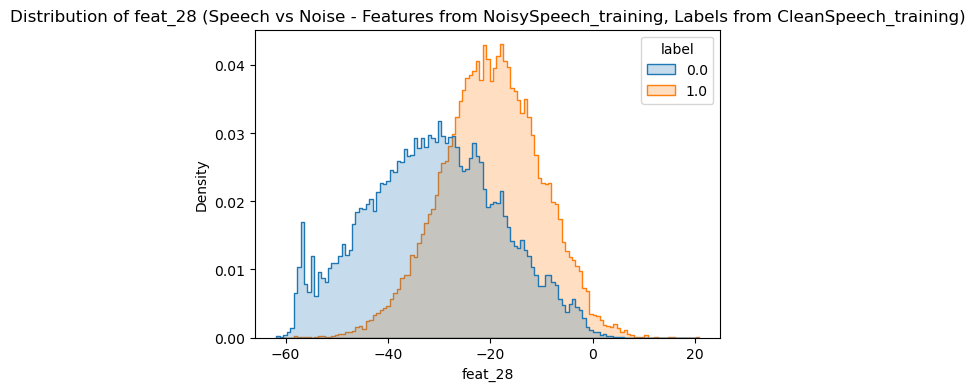

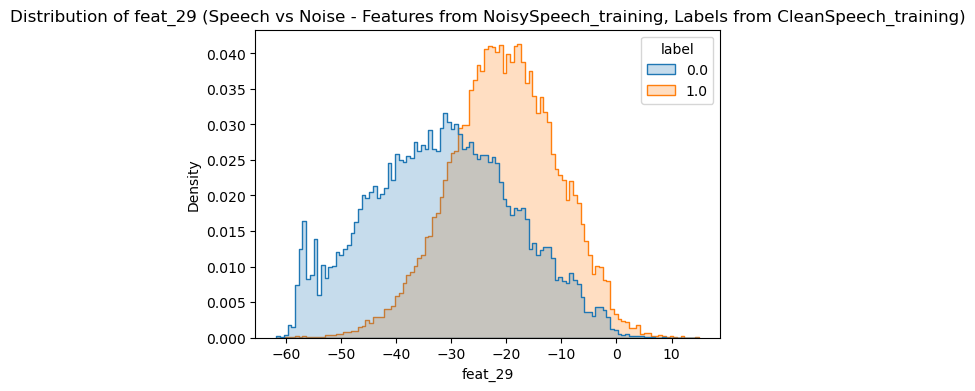

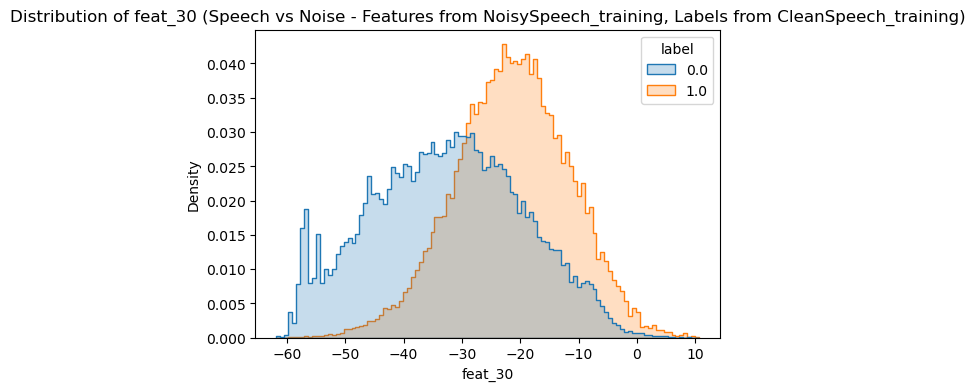

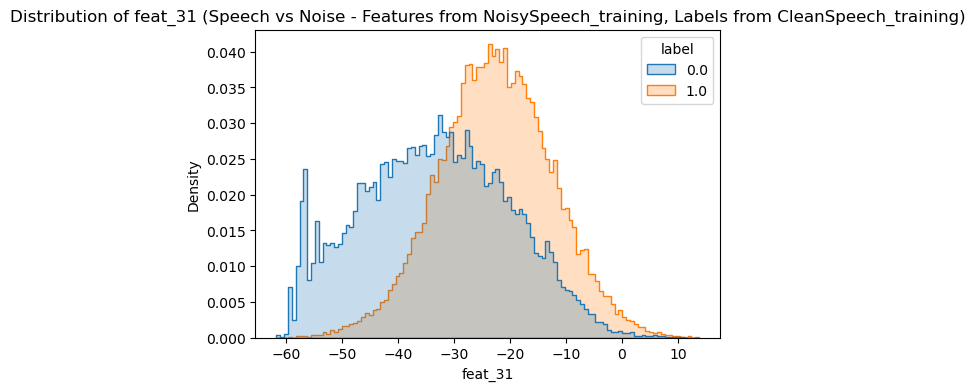

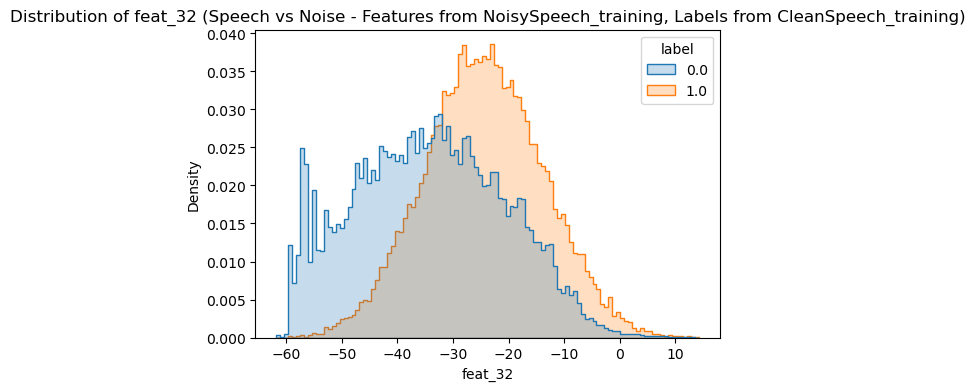

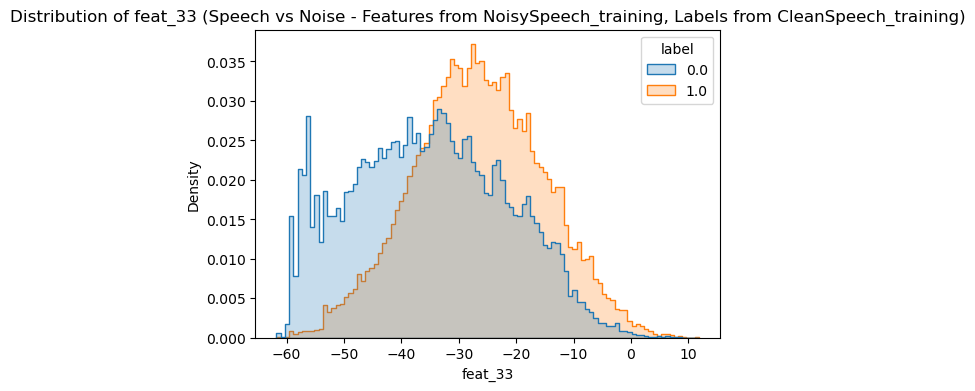

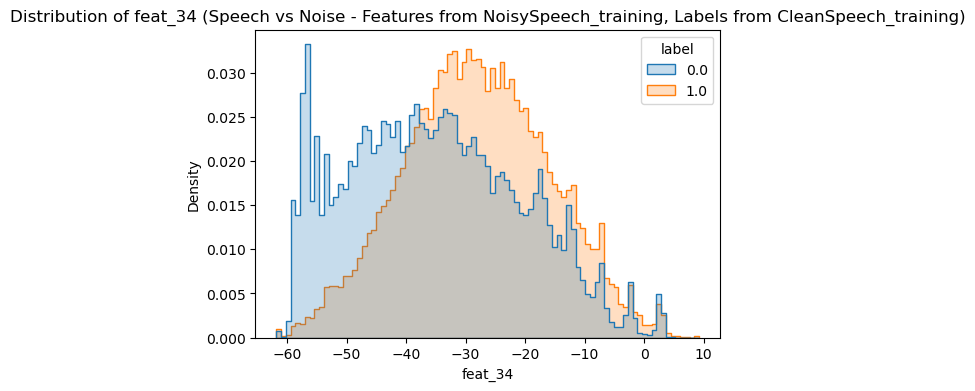

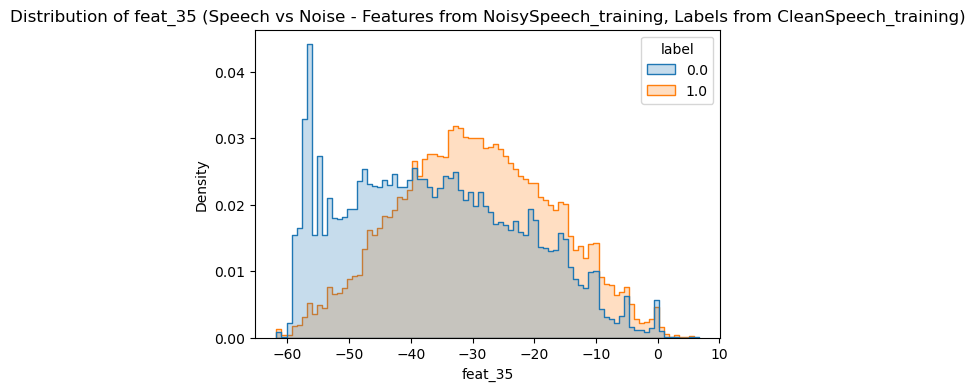

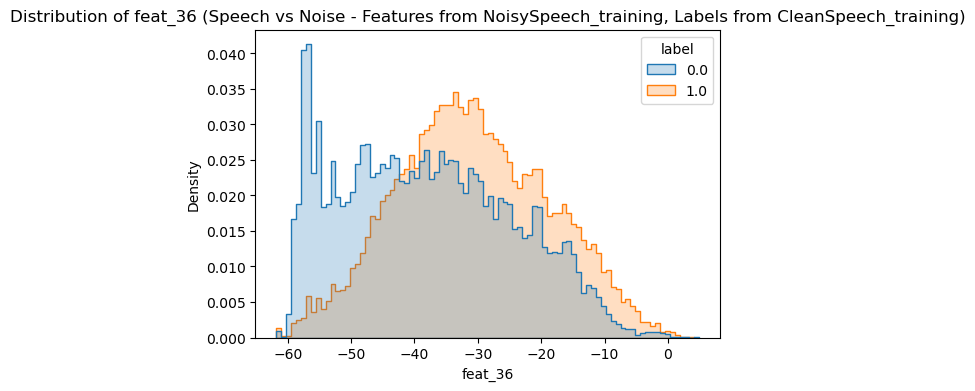

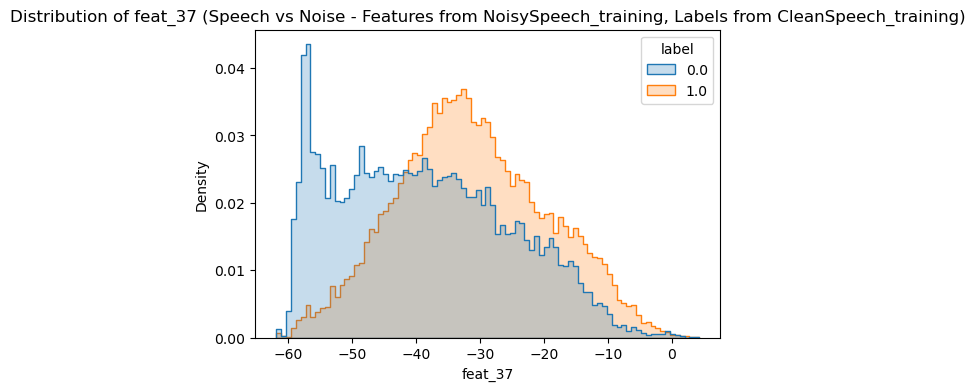

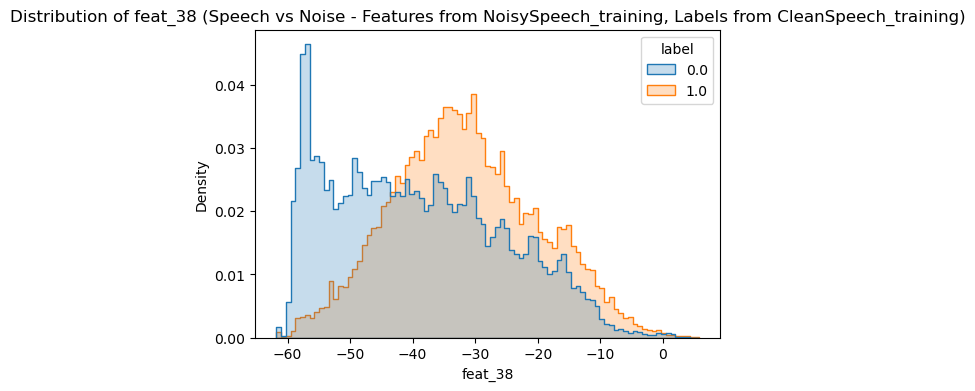

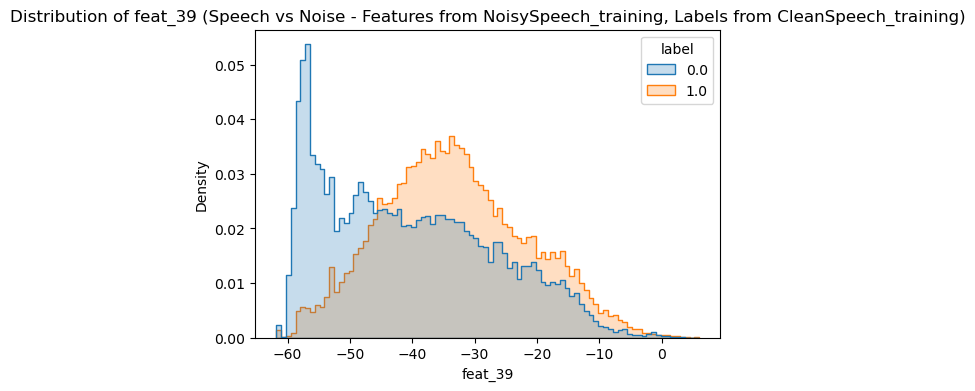

In [7]:
feature_names = df.drop('label', axis=1).columns

for feat in feature_names:
    plt.figure(figsize=(6,4))
    sns.histplot(data=df, x=feat, hue='label', element='step', stat='density', common_norm=False)
    plt.title(f"Distribution of {feat} (Speech vs Noise - Features from NoisySpeech_training, Labels from CleanSpeech_training)")
    plt.show()

In [8]:
X = df.drop('label', axis=1).values
y = df['label'].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)



✅ Decision Tree Accuracy: 89.85%
Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      0.87      0.87      8974
         1.0       0.92      0.92      0.92     13868

    accuracy                           0.90     22842
   macro avg       0.89      0.89      0.89     22842
weighted avg       0.90      0.90      0.90     22842



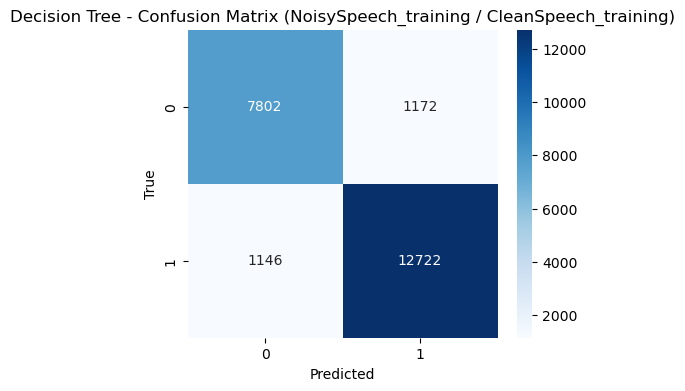


✅ Random Forest Accuracy: 94.08%
Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      0.92      0.92      8974
         1.0       0.95      0.96      0.95     13868

    accuracy                           0.94     22842
   macro avg       0.94      0.94      0.94     22842
weighted avg       0.94      0.94      0.94     22842



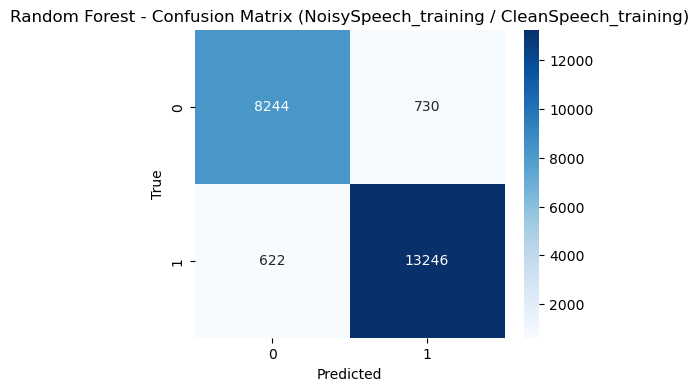


✅ Gradient Boosting Accuracy: 89.02%
Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.84      0.86      8974
         1.0       0.90      0.92      0.91     13868

    accuracy                           0.89     22842
   macro avg       0.89      0.88      0.88     22842
weighted avg       0.89      0.89      0.89     22842



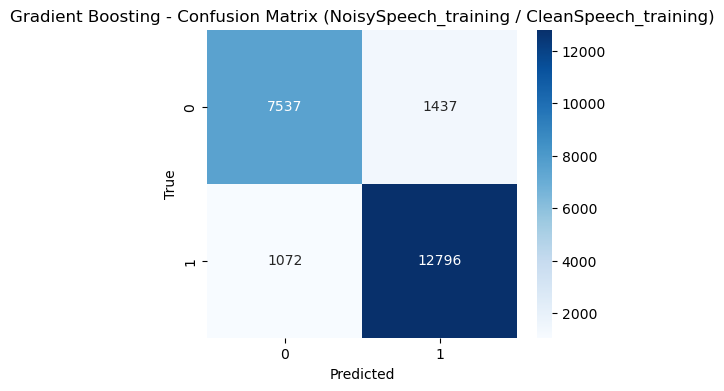


✅ AdaBoost Accuracy: 85.76%
Classification Report:
              precision    recall  f1-score   support

         0.0       0.83      0.80      0.82      8974
         1.0       0.87      0.89      0.88     13868

    accuracy                           0.86     22842
   macro avg       0.85      0.85      0.85     22842
weighted avg       0.86      0.86      0.86     22842



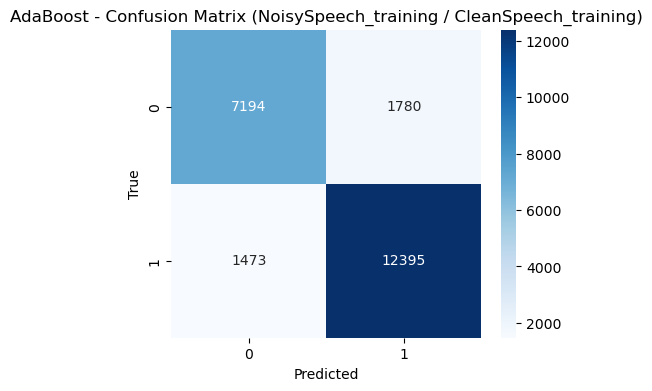

/Users/prathmeshmatodkar/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)



✅ K-Nearest Neighbors Accuracy: 94.74%
Classification Report:
              precision    recall  f1-score   support

         0.0       0.91      0.96      0.94      8974
         1.0       0.98      0.94      0.96     13868

    accuracy                           0.95     22842
   macro avg       0.94      0.95      0.95     22842
weighted avg       0.95      0.95      0.95     22842



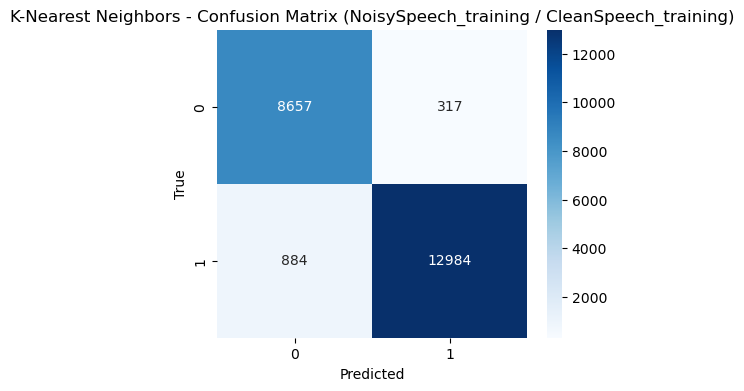


✅ Support Vector Machine Accuracy: 91.64%
Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.90      0.89      8974
         1.0       0.94      0.93      0.93     13868

    accuracy                           0.92     22842
   macro avg       0.91      0.91      0.91     22842
weighted avg       0.92      0.92      0.92     22842



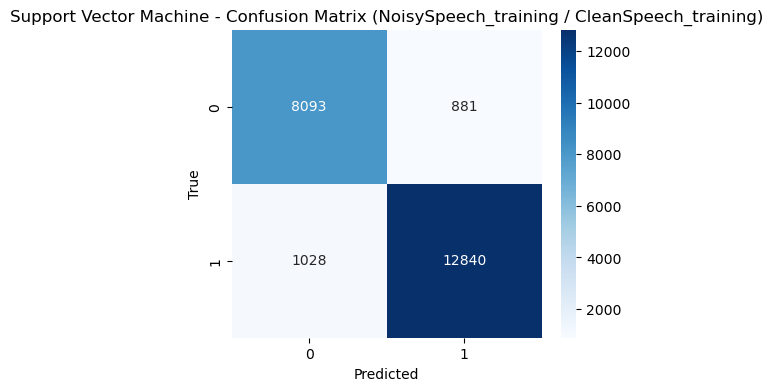


✅ Logistic Regression Accuracy: 85.58%
Classification Report:
              precision    recall  f1-score   support

         0.0       0.84      0.78      0.81      8974
         1.0       0.87      0.90      0.88     13868

    accuracy                           0.86     22842
   macro avg       0.85      0.84      0.85     22842
weighted avg       0.86      0.86      0.85     22842



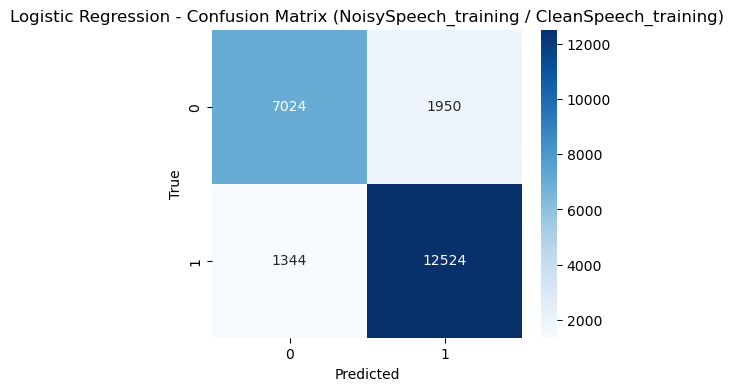


✅ Naive Bayes Accuracy: 78.81%
Classification Report:
              precision    recall  f1-score   support

         0.0       0.75      0.69      0.72      8974
         1.0       0.81      0.85      0.83     13868

    accuracy                           0.79     22842
   macro avg       0.78      0.77      0.77     22842
weighted avg       0.79      0.79      0.79     22842



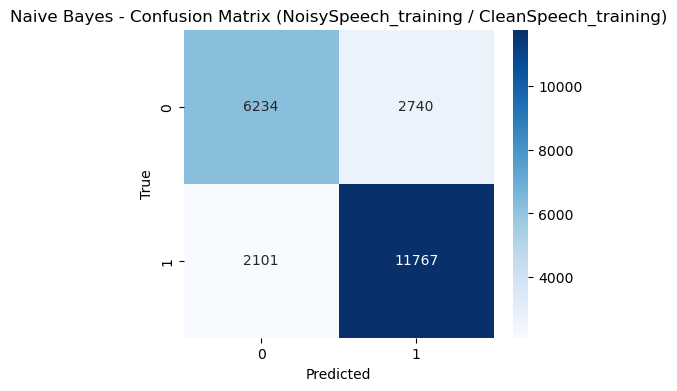

In [9]:
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Support Vector Machine': SVC(kernel='rbf'),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Naive Bayes': GaussianNB()
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"\n✅ {name} Accuracy: {acc*100:.2f}%")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name} - Confusion Matrix (NoisySpeech_training / CleanSpeech_training)')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

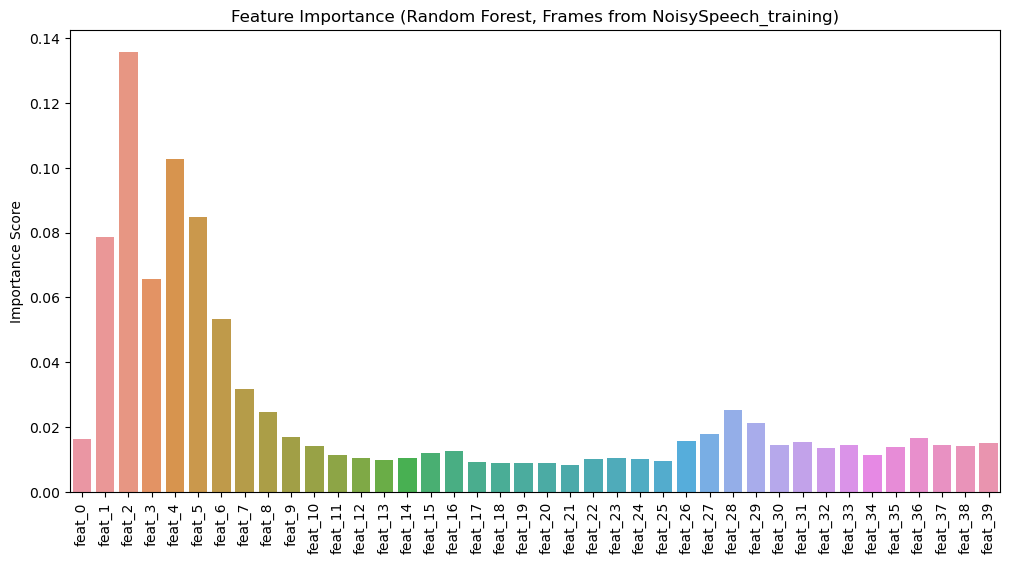

In [10]:
rf_model = models['Random Forest']
importances = rf_model.feature_importances_

plt.figure(figsize=(12,6))
sns.barplot(x=feature_names, y=importances)
plt.title('Feature Importance (Random Forest, Frames from NoisySpeech_training)')
plt.ylabel('Importance Score')
plt.xticks(rotation=90)
plt.show()

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)
